# Basic Spatial Analysis
In this notebook, we will learn how to
- create geometries
- perform measurements
- compute for spatial relationships
- perform spatial operators between objects

In [143]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
from shapely.wkt import loads
from shapely.geometry import Point, LineString, Polygon

plt.rcParams['figure.figsize'] = (15,7)

## 1. Create Objects using Shapely

In [3]:
# Create Point Objects
p1 = Point(0, 0)
p2 = Point(1, 0)
p3 = Point(2, 3)

In [4]:
print(p1)

POINT (0 0)


In [5]:
# Create Line Objects
l1 = LineString([[0, 1], [0, 2], [3, 4]])
l2 = LineString(((2, 0), (3, 1), (2, 1), (3, 0)))

In [6]:
# Create Polygons
poly1 = Polygon([[4, 0], [5, 1], [5, 5]])

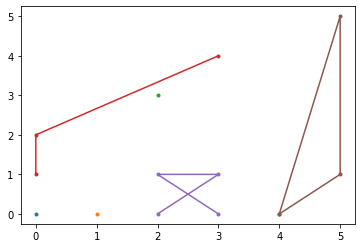

In [7]:
# Visualize the Objects using Matplotlib
plt.plot(*p1.xy, marker='.')
plt.plot(*p2.xy, marker='.')
plt.plot(*p3.xy, marker='.')
plt.plot(*l1.xy, marker='.')
plt.plot(*l2.xy, marker='.')
plt.plot(*poly1.exterior.xy, marker='.')

## 2. SQL Review

In [8]:
# Establish a connection to our sample database "map.sqlite"
conn = sqlite3.connect('map.sqlite')
conn.enable_load_extension(True)
conn.load_extension('mod_spatialite')

In [9]:
# How do you show all tables from the DB?
conn.execute('''
SELECT name
FROM sqlite_master
WHERE
type='table';
''').fetchall()

[('geometry_columns',),
 ('spatial_ref_sys',),
 ('addresses',),
 ('sqlite_sequence',),
 ('buildings',),
 ('water_areas',),
 ('water_lines',),
 ('roads',),
 ('stations',),
 ('amenity_points',),
 ('amenity_polygons',),
 ('trees',),
 ('tunnels',),
 ('bridges',),
 ('landcover',),
 ('power_lines',),
 ('power_line_columns',)]

In [10]:
df = pd.read_sql('''
SELECT name
FROM sqlite_master
WHERE type='table'
LIMIT 5
''', conn)

In [11]:
df

,name
0,geometry_columns
1,spatial_ref_sys
2,addresses
3,sqlite_sequence
4,buildings


In [12]:
# Show first five rows for the table amenity_points
pd.read_sql('''
SELECT *
FROM amenity_points
LIMIT 5
''', conn)

,ogc_fid,GEOMETRY,osm_id,highway,amenity,name,operator,sport,addr:housenumber,leisure,...,facebook,drink:espresso,drink:filter_coffee,official_name,fax,old_name,description,share_taxi,bicycle_parking,addr:unit
0,1,b'\x01\x01\x00\x00\x00\xa6\xb38\x08\xdf@^@hi]Y...,27049508,traffic_signals,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2,b'\x01\x01\x00\x00\x00\xc2s\xa5T\xf8@^@\xd5V\x...,6687031928,traffic_signals,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,3,b'\x01\x01\x00\x00\x00\x86\xdcV\xc4\xfa@^@B\x1...,6687031926,traffic_signals,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,4,b'\x01\x01\x00\x00\x00~\x9aI\x8a\xfe@^@\x17\xd...,313868248,traffic_signals,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,5,b'\x01\x01\x00\x00\x00\xfd\x8e<k\x12A^@\xc2\x1...,7016175494,None,restaurant,Azami,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [13]:
# Show amenity points with names
pd.read_sql('''
SELECT *
FROM amenity_points
WHERE name != "None"
LIMIT 10
''', conn)

,ogc_fid,GEOMETRY,osm_id,highway,amenity,name,operator,sport,addr:housenumber,leisure,...,facebook,drink:espresso,drink:filter_coffee,official_name,fax,old_name,description,share_taxi,bicycle_parking,addr:unit
0,5,b'\x01\x01\x00\x00\x00\xfd\x8e<k\x12A^@\xc2\x1...,7016175494,None,restaurant,Azami,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,6,b'\x01\x01\x00\x00\x000\x1d)\x11\x17A^@!0 \xc5...,6688502276,None,parking_entrance,One Corporate Plaza Basement Parking,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,7,b'\x01\x01\x00\x00\x00\x92\x15\rc\x1cA^@Nk\x89...,659639221,None,bank,BDO,BDO Unibank,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,8,b'\x01\x01\x00\x00\x00\x13-\xd4\xf5\x1fA^@\xc5...,6679558277,None,None,Elorde Top Team,None,boxing;kickboxing;weightlifting,843,fitness_centre,...,None,None,None,None,None,None,None,None,None,None
4,9,"b'\x01\x01\x00\x00\x00\xe17\xcf""%A^@\xe8=\x84\...",4515017489,None,embassy,Bulgarian Consulate,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,11,b'\x01\x01\x00\x00\x00\x91\xf0\xbd\xbfAA^@\xf1...,255072280,None,None,Pasia,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,12,b'\x01\x01\x00\x00\x002\x16\xf2\xad4A^@X?\x91\...,6320066120,None,cafe,Hineleban Cafe,None,None,830,None,...,None,None,None,None,None,None,None,None,None,None
7,13,b'\x01\x01\x00\x00\x00\x15\xfdF\xe04A^@\x0f\xe...,6320063102,None,None,Gran Trail Cycles Makati,None,None,830,None,...,None,None,None,None,None,None,None,None,None,None
8,14,b'\x01\x01\x00\x00\x00C\x02F\x977A^@\x89\x87\x...,432151356,None,bank,Citibank Savings,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,17,b'\x01\x01\x00\x00\x00\x8dj\xc7\xc31A^@u\x84\x...,7029669570,None,restaurant,Croque Cafe + Bakery,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [14]:
# What are the amenity types in the amenity_points table?
pd.read_sql('''
SELECT DISTINCT a.amenity
FROM amenity_points as a
''', conn)

,amenity
0,None
1,restaurant
2,parking_entrance
3,bank
4,embassy
5,cafe
6,fast_food
7,dentist
8,bar
9,pharmacy


In [15]:
pd.read_sql('''
SELECT amenity
FROM amenity_points
GROUP BY 1
''', conn)

,amenity
0,None
1,atm
2,bank
3,bar
4,bicycle_parking
5,bureau_de_change
6,cafe
7,cinema
8,coworking_space
9,dentist


#### Exercise: Rank the amenities by most frequent to least frequent.

In [16]:
# Your Code Here
pd.read_sql('''
SELECT amenity, count(*)
FROM amenity_points
WHERE amenity IS NOT NULL
GROUP BY 1
ORDER BY 2 DESC
''',conn)

,amenity,count(*)
0,restaurant,59
1,bank,51
2,cafe,16
3,fast_food,11
4,parking_entrance,7
5,bar,6
6,parking,4
7,embassy,4
8,bicycle_parking,3
9,pub,2


## 3. Creating Geometries Through SQL
We will now create points, lines, and polygons using SQL commands
- ST_MakePoint / MakePoint
- ST_MakeLine / MakeLine
- ST_MakePolygon / MakePolygon
- ST_GeomFromText

In [17]:
# Creating Points
pd.read_sql('''
SELECT MakePoint(1,0,4326) as point
''', conn)

,point
0,b'\x00\x01\xe6\x10\x00\x00\x00\x00\x00\x00\x00...


In [18]:
## Use ST_AsText to make the geometry Human Readable
pd.read_sql('''
SELECT ST_AsText(MakePoint(1,0,4326)) as point
''',conn)

,point
0,POINT(1 0)


In [19]:
# If we want to use our shapely object, we use:
pd.read_sql('''
SELECT ST_AsText(GeomFromText(?)) as point
''', conn, params = [p1.wkt])

,point
0,POINT(0 0)


In [20]:
# We lose info on the SRID, we use SetSRID to add SR information
pd.read_sql('''
SELECT ST_AsText(SetSRID(GeomFromText(?),4326)) as point
''', conn, params = [p1.wkt])

,point
0,POINT(0 0)


In [21]:
# Creating Lines
pd.read_sql('''
SELECT ST_AsText(MakeLine(MakePoint(1,0),MakePoint(2,0))) as line
''', conn)

,line
0,"LINESTRING(1 0, 2 0)"


In [22]:
# Use our shapely object to create a line
pd.read_sql('''
SELECT ST_AsText(SetSRID(GeomFromText(?),4326)) as line
''', conn, params = [l1.wkt])

,line
0,"LINESTRING(0 1, 0 2, 3 4)"


#### Exercise: Create a Polygon going from (0,0) to (0,1) to (1,0) and back to (0,0)


In [23]:
# Your Code
poly = Polygon([[0, 0], [0, 1], [1, 0], [1,1]])

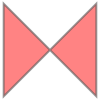

In [24]:
poly

In [25]:
pd.read_sql('''
SELECT ST_AsText(SetSRID(GeomFromText(?),4326)) as poly
''', conn, params=[poly.wkt])

,poly
0,"POLYGON((0 0, 0 1, 1 0, 1 1, 0 0))"


##  4. Measurements

### Proximity
- ST_Distance
- ST_DWithin / PtDistWithin

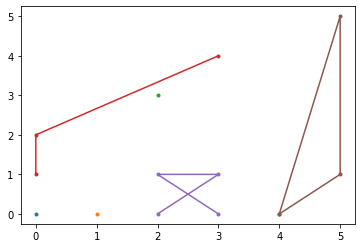

In [26]:
plt.plot(*p1.xy, marker='.')
plt.plot(*p2.xy, marker='.')
plt.plot(*p3.xy, marker='.')
plt.plot(*l1.xy, marker='.')
plt.plot(*l2.xy, marker='.')
plt.plot(*poly1.exterior.xy, marker='.')

In [27]:
# Use ST_Distance to compute distance between p1 and p2
pd.read_sql('''
SELECT ST_Distance(ST_GeomFromText(?),ST_GeomFromText(?)) as dist
''',conn,params = [p1.wkt,p2.wkt])

,dist
0,1.0


In [28]:
# What is the distance between p1 and l1?
pd.read_sql('''
SELECT ST_Distance(ST_GeomFromText(?),ST_GeomFromText(?)) as dist
''',conn,params = [p1.wkt,l1.wkt])

,dist
0,1.0


In [29]:
# What is the distance between p1 and l1?
pd.read_sql('''
SELECT ST_Distance(ST_GeomFromText(?),ST_GeomFromText(?)) as dist
''',conn,params = [p3.wkt,l1.wkt])

,dist
0,0.27735


In [30]:
# ST_DWithin / PTDistWithin returns a boolean if two points are within a specified distance from each other
pd.read_sql('''
SELECT PTDistWithin(ST_GeomFromText(?),ST_GeomFromText(?),0.5) as within
''',conn,params = [p1.wkt,p2.wkt])

,within
0,0


In [31]:
# What is the distance between l1 and l2?


### Measurements
 - ST_NPoints
 - ST_Length / GLength
 - ST_Area
 - ST_Perimeter

In [32]:
# How many points are there in l1?
pd.read_sql('''
SELECT ST_NPoints(ST_GeomFromText(?)) as points
''', conn, params = [l1.wkt])

,points
0,3


In [33]:
# What is the total length of l2?
pd.read_sql('''
SELECT ST_Length(ST_GeomFromText(?)) as points
''', conn, params = [l2.wkt])

,points
0,3.828427


In [34]:
# What is the area of poly1?
pd.read_sql('''
SELECT ST_Area(ST_GeomFromText(?)) as points
''', conn, params = [poly1.wkt])

,points
0,2.0


In [35]:
# What is the perimeter of poly1?
pd.read_sql('''
SELECT ST_Perimeter(ST_GeomFromText(?)) as points
''', conn, params = [poly1.wkt])

,points
0,10.513233


## 5. Spatial Relationship
 - ST_IsSimple

In [36]:
# What is ST_IsSimple? (use l1 then l2 to check)


#### Add more polygons

In [37]:
poly2 = Polygon([[1, 1], [1, 4], [4, 4], [4, 1]])
poly3 = Polygon([[2, 2], [2, 3], [4.75, 3], [4.75, 2]])
poly4 = Polygon([[-1, 2], [-1, 3], [4.75, 3], [4.75, 2]])
poly5 = Polygon([[1.5, 1.5], [1.5, 2.5], [2.5, 2.5], [2.5, 1.5]])

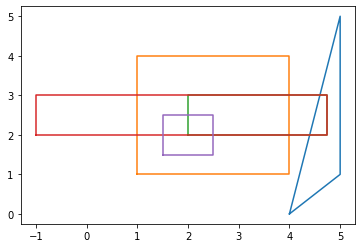

In [38]:
plt.plot(*poly1.exterior.xy)
plt.plot(*poly2.exterior.xy)
plt.plot(*poly3.exterior.xy)
plt.plot(*poly4.exterior.xy)
plt.plot(*poly5.exterior.xy)

#### Exercise: Use the five polygons to determine the functionalites of the following functions:
- ST_Disjoint
- ST_Intersects
- ST_Overlaps
- ST_Within / ST_Contains

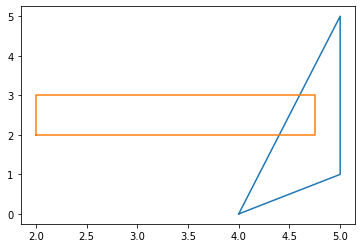

In [39]:
plt.plot(*poly1.exterior.xy)
plt.plot(*poly3.exterior.xy)

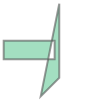

In [40]:
# Your Code Here
df = pd.read_sql('''
SELECT ST_AsText(ST_SymDifference(ST_GeomFromText(?), ST_GeomFromText(?)))as poly
''', conn, params=[poly1.wkt, poly3.wkt])
loads(df.poly[0])

In [41]:
l1 = LineString([[0, 0], [0, 1]])
l2 = LineString(((0, 1), (0, 0)))

In [42]:
pd.read_sql('''
SELECT ST_Equals(ST_GeomFromText(?), ST_GeomFromText(?)) as dist
''', conn, params=[l1.wkt, l2.wkt])

,dist
0,1


#### Other Functions
- ST_Equals
- ST_Touches

## 6. Spatial Operators
- ST_Union
- ST_Intersection
- ST_Difference
- ST_SymDifference
- ST_Buffer

In [43]:
# Code Here
# Your Code Here
pd.read_sql('''
SELECT ST_Union(ST_GeomFromText(?), ST_GeomFromText(?)) as dist
''', conn, params=[poly1.wkt, poly3.wkt])

,dist
0,b'\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00...


## Exercise

Using shapely and the functions that we discussed, create a map of the Gamboa-Salcedo-Benavidez-Paseo block with all the possible objects that you can include. Answer the following questions:
1. What is the perimeter of the entire block?
2. What is the total length of the streets within the block? (include the boundary streets)
3. What is the area of the perimeter block?
4. What is the distance of Herco Center from the Mosaic Tower?


![logo](aim_map.PNG)

In [44]:
# #Your Code here

# # Create Point Objects
# p1 = Point(0, 0)
# p2 = Point(1, 0)
# p3 = Point(2, 3)
# # Create Line Objects
# l1 = LineString([[0, 1], [0, 2], [3, 4]])
# l2 = LineString(((2, 0), (3, 1), (2, 1), (3, 0)))
# # Create Polygons
# poly1 = Polygon([[4, 0], [5, 1], [5, 5]])

# plt.plot(*p1.xy, marker='.')
# plt.plot(*p2.xy, marker='.')
# plt.plot(*p3.xy, marker='.')
# plt.plot(*l1.xy, marker='.')
# plt.plot(*l2.xy, marker='.')
# plt.plot(*poly1.exterior.xy, marker='.')

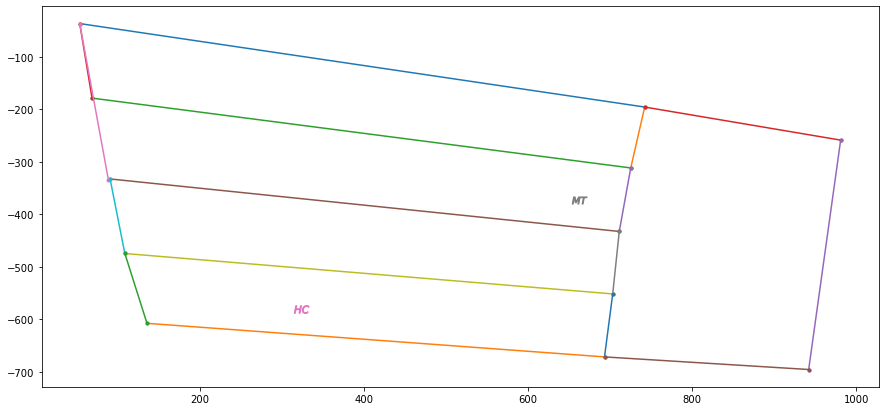

In [148]:
GT = LineString([[53,-37], [742, -196]])
TS = LineString([[742, -196], [725, -312]])
S = LineString([[725,-312], [68, -179]])
SaS = LineString([[68,-179], [53, -37]])

TA = LineString([[725,-312], [711, -433]])
A = LineString([[90,-333], [711, -433]])
SaA = LineString([[53, -37], [88, -335]])

TJ = LineString([[711, -433], [703, -552]])
J = LineString([[703, -552], [108, -475]])
SaJ = LineString([[90,-333], [108, -475]])

TB = LineString([[703, -552], [693, -672]])
B = LineString([[693, -672], [135, -608]])
SaB = LineString([[108, -475], [135, -608]])


GP = LineString([[742, -196], [981, -259]])
P = LineString([[981, -259], [942, -696]])
BP = LineString([[693, -672], [942, -696]])
x = LineString([[703, -552], [693, -672]])


herco = Point(323, -580)
mosaic = Point(662, -373)


plt.plot(*GT.xy, marker='.')
plt.plot(*TS.xy, marker='.')
plt.plot(*S.xy, marker='.')
plt.plot(*SaS.xy, marker='.')

plt.plot(*TA.xy, marker='.')
plt.plot(*A.xy, marker='.')
plt.plot(*SaA.xy, marker='.')

plt.plot(*TJ.xy, marker='.')
plt.plot(*J.xy, marker='.')
plt.plot(*SaJ.xy, marker='.')
plt.plot(*TB.xy, marker='.')
plt.plot(*B.xy, marker='.')
plt.plot(*SaB.xy, marker='.')


plt.plot(*GP.xy, marker='.')
plt.plot(*P.xy, marker='.')
plt.plot(*BP.xy, marker='.')

plt.plot(*herco.xy, marker='$HC$', markersize=15)
plt.plot(*mosaic.xy, marker='$MT$', markersize=15)
plt.show()
# plt.plot(*SaB.xy, marker='.')

## Q1

In [98]:
# What is the perimeter of the entire block?
entire_block = pd.read_sql('''
SELECT 
    ST_Length(ST_GeomFromText(?)) as GT,
    ST_Length(ST_GeomFromText(?)) as GP,
    ST_Length(ST_GeomFromText(?)) as P,
    ST_Length(ST_GeomFromText(?)) as BP,
    ST_Length(ST_GeomFromText(?)) as B,
    ST_Length(ST_GeomFromText(?)) as SaB,
    ST_Length(ST_GeomFromText(?)) as SaJ,
    ST_Length(ST_GeomFromText(?)) as SaA,
    ST_Length(ST_GeomFromText(?)) as SaS
''', conn, params = [GT.wkt, GP.wkt, P.wkt, BP.wkt, B.wkt, SaB.wkt, SaJ.wkt, SaA.wkt, SaS.wkt]).T
entire_block.columns=['Points']
print('Perimeter of Entire Block :',entire_block.sum().values[0])

Perimeter of Entire Block : 2926.508759591212


## Q2

In [125]:
# What is the total length of the streets within the block? (include the boundary streets)

def Length_of(street, name, print_=True):
    street = pd.read_sql(f'''
    SELECT 
        ST_Length(ST_GeomFromText(?)) as street
    ''', conn, params = [street.wkt]).T
    street.columns=['Points']
    if print_:
        print(f'Length of {name}: ', street.values[0][0])
    return street.values[0][0]


Length_of(S,'Soria')
Length_of(A,'Aguirre')
Length_of(J,'Jimenez')
print('Length of Trasierra: ', Length_of(TS,'', False) + Length_of(TA,'', False)+ Length_of(TJ,'', False)+ Length_of(TB,'', False));

print('\nBoundary\n---------')
print('Length of Gamboa: ', Length_of(GT,'', False) + Length_of(GP,'', False))
Length_of(P,'Paseo De Roxas')
print('Length of Benavidez: ', Length_of(B,'', False) + Length_of(BP,'', False))
print('Length of Salcedo: ', Length_of(SaS,'', False) + Length_of(SaA,'', False) + Length_of(SaJ,'', False) + Length_of(SaB,'', False));

Length of Soria:  670.3267859783018
Length of Aguirre:  629.0
Length of Jimenez:  599.9616654420514
Length of Trasierra:  478.7308469367739

Boundary
---------
Length of Gamboa:  954.2721086222891
Length of Paseo De Roxas:  438.73682316395553
Length of Benavidez:  811.8122116836262
Length of Salcedo:  721.6876161213409


In [150]:
total = sum([Length_of(S,'Soria'), Length_of(A,'Aguirre'),
            Length_of(J,'Jimenez'), Length_of(TS,'', False) ,
            Length_of(TA,'', False), Length_of(TJ,'', False),
            Length_of(TB,'', False), Length_of(GT,'', False),
            Length_of(GP,'', False), Length_of(P,'Paseo De Roxas'),
            Length_of(B,'', False), Length_of(BP,'', False), 
            Length_of(SaS,'', False), Length_of(SaA,'', False), 
            Length_of(SaJ,'', False), Length_of(SaB,'', False)])
print('Total Lenght of streets: ', total)

Length of Soria:  670.3267859783018
Length of Aguirre:  629.0
Length of Jimenez:  599.9616654420514
Length of Paseo De Roxas:  438.73682316395553
Total Lenght of streets:  5304.52805794834


## Q3

,points
0,433887.5


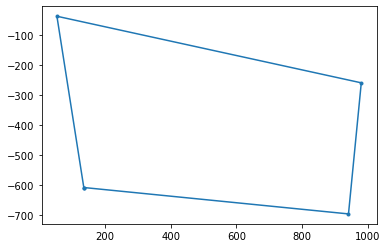

In [128]:
block = Polygon([[135, -608], [942, -696], [981, -259], [53,-37], [135, -608]])
plt.plot(*block.exterior.xy, marker='.')

pd.read_sql('''
SELECT ST_Area(ST_GeomFromText(?)) as points
''', conn, params = [block.wkt])

## Q4

In [147]:
pd.read_sql('''
SELECT ST_Distance(ST_GeomFromText(?),ST_GeomFromText(?)) as dist_between_Herco_Center_and_Mosaic_Tower
''',conn,params = [herco.wkt,mosaic.wkt])

,dist_between_Herco_Center_and_Mosaic_Tower
0,397.202719
